In [4]:
import tensorflow
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.callbacks import History
from keras.optimizers import Adam
from keras.utils import plot_model
import matplotlib.pyplot as plt


from keras.datasets import mnist
from matplotlib.ticker import MaxNLocator


''' global plotting settings '''
#plt.style.use('seaborn-paper')
# Update the matplotlib configuration parameters:
plt.rcParams.update({'text.usetex': False,
                     'lines.linewidth': 3,
                     'font.family': 'sans-serif',
                     'font.serif': 'Helvetica',
                     'font.size': 14,
                     'xtick.labelsize': 'large',
                     'ytick.labelsize': 'large',
                     'axes.labelsize': 'large',
                     'axes.titlesize': 'large',
                     'axes.grid': True,
                     'grid.alpha': 0.53,
                     'lines.markersize': 12,
                     'legend.borderpad': 0.2,
                     'legend.fancybox': True,
                     'legend.fontsize': 'medium',
                     'legend.framealpha': 0.7,
                     'legend.handletextpad': 0.1,
                     'legend.labelspacing': 0.2,
                     'legend.loc': 'best',
                     'figure.figsize': (12,8),
                     'savefig.dpi': 100,
                     'pdf.compression': 9})


"""
This jupyter notebook is based on using machine learning 
to reconstruct vectors after they have been shrunk
"""

'\nThis jupyter notebook is based on using machine learning \nto reconstruct vectors after they have been shrunk\n'

In [6]:
""" 
this cell is for generating datasets

"""

  # generate some random vectors, 10k that are 1x20
input_size = 10000
    
  # first take a random 90% of the data, use it as our training data
train_data = np.random.rand(int(input_size), 20)

train_in, train_out = train_data, train_data  # identical in/out


  # take everything else to be our testing data
test_data = np.random.rand(int(input_size), 20)

test_in, test_out = test_data, test_data

In [7]:
""" 
making a net with several hidden layers and some dropout sprinkled in because that's cool
"""

  # initialize a linear network structure
model = Sequential()

  # add some layers
model.add(Dense(units=20, activation='relu', input_dim=(20)))

model.add(Dense(units=18, activation='relu'))

model.add(Dense(units=14, activation='relu'))

model.add(Dense(units=10, activation='relu'))

model.add(Dense(units=8, activation='relu'))

model.add(Dense(units=10, activation='relu'))

model.add(Dense(units=14, activation='relu'))

model.add(Dense(units=18, activation='relu'))

model.add(Dense(units=20, activation='sigmoid'))

  # configure learning process
model.compile(loss='mse', optimizer='Adam')

  # train model for a few epochs. x is the input, y is the target (TRAINING) data
history = model.fit(x=train_in, y=train_out, epochs=50, verbose=2, batch_size=1, validation_data=[test_in, test_out])


Train on 10000 samples, validate on 10000 samples
Epoch 1/50
 - 12s - loss: 0.0746 - val_loss: 0.0712
Epoch 2/50
 - 12s - loss: 0.0709 - val_loss: 0.0691
Epoch 3/50
 - 12s - loss: 0.0646 - val_loss: 0.0630
Epoch 4/50
 - 11s - loss: 0.0627 - val_loss: 0.0630
Epoch 5/50
 - 11s - loss: 0.0624 - val_loss: 0.0629
Epoch 6/50
 - 13s - loss: 0.0623 - val_loss: 0.0627
Epoch 7/50
 - 12s - loss: 0.0621 - val_loss: 0.0624
Epoch 8/50
 - 11s - loss: 0.0619 - val_loss: 0.0623
Epoch 9/50
 - 11s - loss: 0.0618 - val_loss: 0.0624
Epoch 10/50
 - 12s - loss: 0.0596 - val_loss: 0.0584
Epoch 11/50
 - 12s - loss: 0.0579 - val_loss: 0.0587
Epoch 12/50
 - 12s - loss: 0.0578 - val_loss: 0.0590
Epoch 13/50
 - 12s - loss: 0.0576 - val_loss: 0.0582
Epoch 14/50
 - 12s - loss: 0.0576 - val_loss: 0.0588
Epoch 15/50
 - 12s - loss: 0.0574 - val_loss: 0.0584
Epoch 16/50
 - 12s - loss: 0.0574 - val_loss: 0.0580
Epoch 17/50
 - 12s - loss: 0.0573 - val_loss: 0.0595
Epoch 18/50
 - 12s - loss: 0.0570 - val_loss: 0.0577
Epoch



Result of testing on test data:
['loss']




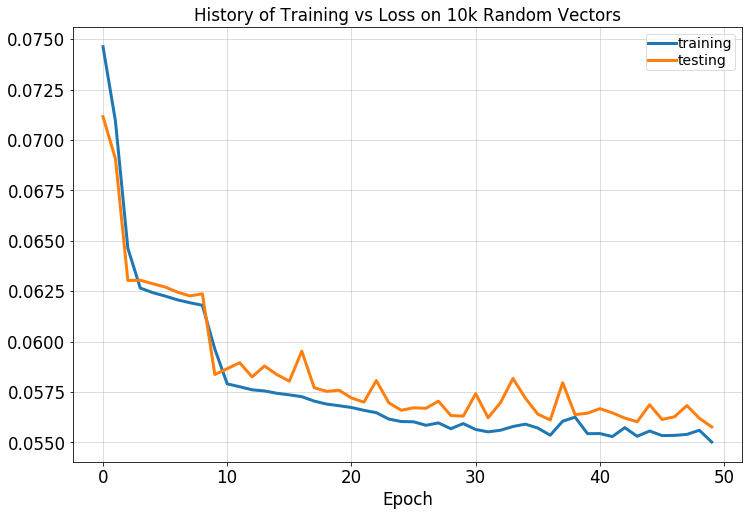

In [12]:
# evaluate performance, x is input and y is target (TESTING) data
    
print("\n\nResult of testing on test data:")
print(model.metrics_names)
print("\n")


# Plot training & validation loss values
plt.plot(history.history['loss'], label="training")
plt.plot(history.history['val_loss'], label="testing")

#plt.axhline(0.05, color="r", label="Target")

plt.title('History of Training vs Loss on 10k Random Vectors')
plt.xlabel('Epoch')
plt.savefig("HistoryofLoss")
plt.legend(loc='upper right')
plt.savefig("HistoryofLoss")
plt.show()

In [11]:
plt.savefig("HistoryofLoss")

<Figure size 864x576 with 0 Axes>